In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/Object Dectection Road Dataset.v1i.yolokeras"
subfolders = os.listdir(dataset_path)

print("Subfolders in the dataset:")
for folder in subfolders:
    print(folder)

Subfolders in the dataset:
README.dataset.txt
README.roboflow.txt
test
valid
train


In [ ]:
# Set the path to the dataset
dataset_path = '/content/drive/MyDrive/Object Dectection Road Dataset.v1i.yolokeras'
classes = os.listdir(dataset_path)

# Parameters
img_height, img_width = 150, 150  # Image dimensions
batch_size = 32

# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 236 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # Output layer for multiple classes

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dataset_path = '/content/drive/MyDrive/Object Dectection Road Dataset.v1i.yolokeras'
classes = os.listdir(dataset_path)
print("Left Turns, Pothole, Right Turn, Road Slide, Straight Roads, Tunnels:", len(classes))
print("6:", classes)

Left Turns, Pothole, Right Turn, Road Slide, Straight Roads, Tunnels: 5
6: ['README.dataset.txt', 'README.roboflow.txt', 'test', 'valid', 'train']


In [ ]:
train_generator = train_datagen.flow_from_directory(
       dataset_path,
       target_size=(img_height, img_width),
       batch_size=batch_size,
       class_mode='categorical',
       subset='training'
   )

Found 236 images belonging to 3 classes.


In [ ]:
model.compile(optimizer='adam',  # or any other optimizer
                 loss='categorical_crossentropy',  # for multi-class classification
                 metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set parameters
img_height, img_width = 150, 150  # Adjust based on your dataset
batch_size = 32
num_classes = 3  # Adjust according to your number of classes
dataset_path = '/content/drive/MyDrive/Object Dectection Road Dataset.v1i.yolokeras'  # Change to your dataset path

In [ ]:
# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% for validation
)

In [ ]:
# Create training generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

Found 236 images belonging to 3 classes.


In [ ]:
# Create validation generator
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 56 images belonging to 3 classes.


In [ ]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=2,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 983ms/step - accuracy: 0.7103 - loss: 0.8567 - val_accuracy: 0.6875 - val_loss: 0.8761
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6562 - loss: 0.8707 - val_accuracy: 0.7500 - val_loss: 0.8001


In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step - accuracy: 0.7500 - loss: 0.8098
Validation Loss: 0.8098, Validation Accuracy: 0.7500


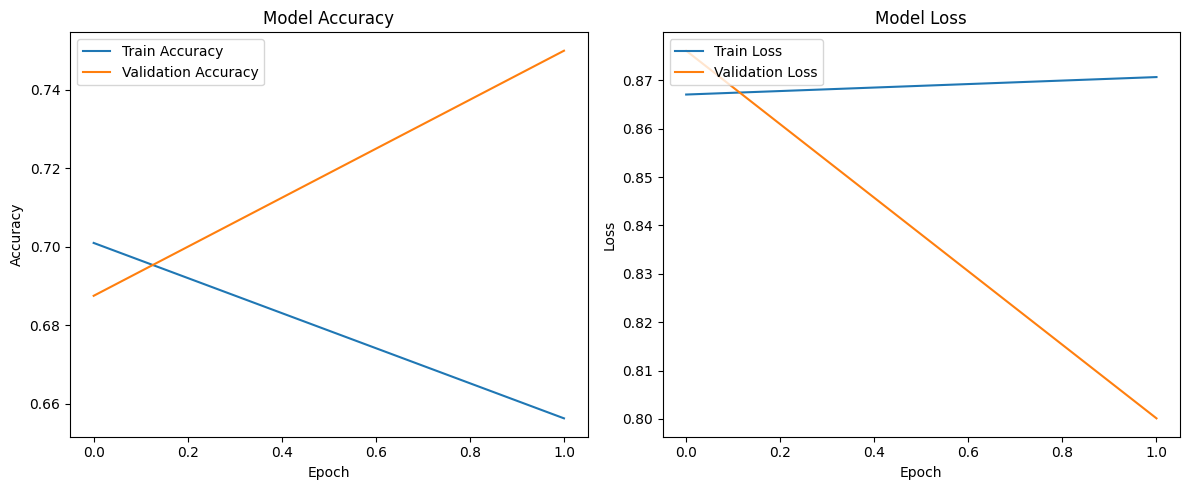

In [ ]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(validation_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


In [ ]:
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

num_predictions = len(y_pred_classes)
y_true_subset = y_true[:num_predictions]  # This line is now correctly indented
cm = confusion_matrix(y_true_subset, y_pred_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step


In [ ]:
# Get true labels
y_true = validation_generator.classes  # This should give you the true labels

In [ ]:
print(f"Number of true labels: {len(y_true)}")
print(f"Number of predicted labels: {len(y_pred_classes)}")

Number of true labels: 56
Number of predicted labels: 56


In [ ]:
cm

array([[ 0,  5,  0],
       [ 0, 40,  0],
       [ 0, 11,  0]])

In [ ]:
model.evaluate(validation_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.7158 - loss: 0.8413


[0.8458648324012756, 0.7142857313156128]

In [37]:
train_generator.class_indices

{'test': 0, 'train': 1, 'valid': 2}